In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus

from time import time
from sklearn import tree
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from six import StringIO

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
plt.style.use("ggplot")

In [2]:
df_bf = pd.read_csv("data/bank-additional-full.csv", sep=";")
print ('Data read into a pandas dataframe!')
df_bf

Data read into a pandas dataframe!


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#  Data Preparation

In [3]:
# Show the data info
df_bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# show the data head 
df_bf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# show the data tail 
df_bf.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
#Missing value checking
print("To check if any colun has null values :")
print(df_bf.isnull().sum())

To check if any colun has null values :
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [7]:
#show the dimension of the data
df_bf.shape

(41188, 21)

In [8]:
print("describing categorical columns : ")
df_bf.describe(exclude="number")

describing categorical columns : 


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [9]:
print("describing numerical columns : ")
df_bf.describe().T

describing numerical columns : 


,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


# Data Visualization

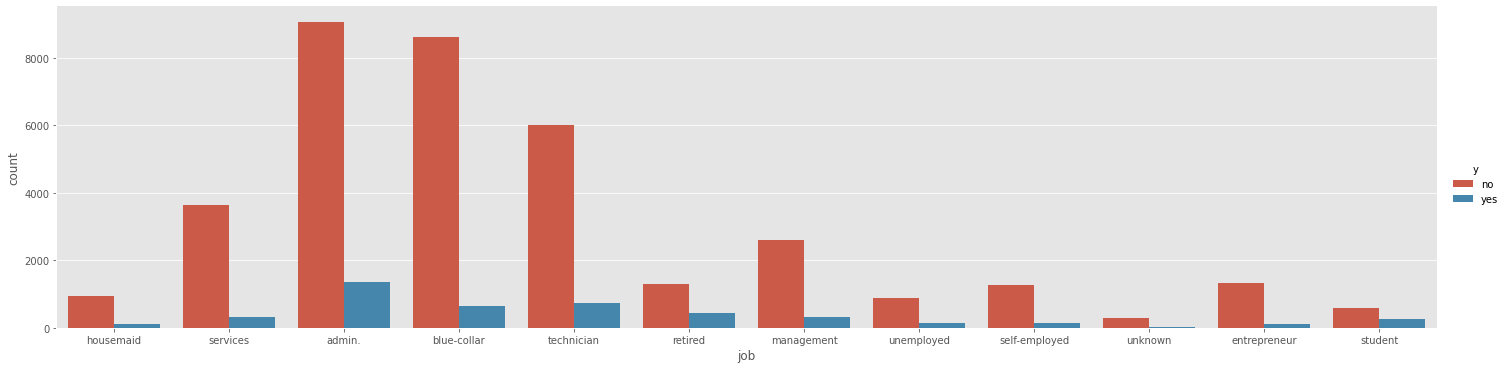

In [10]:
#Barchart
sns.catplot(x='job',hue='y',kind='count',data=df_bf, aspect=4)

# Insight : 
Clients who have the most time deposits are those who work as admin

# Modelling

In [11]:
# separating data y with data x
X=df_bf.drop(['y'],axis=1)
y=df_bf['y']

In [12]:
# Check the unique of variables

df_bf.apply(lambda x : len(x.unique()))

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [13]:
# Drop variables that have not important to enter the model
X=X.drop(columns=['contact','month','day_of_week','poutcome'])
X

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [14]:
#replace all the categorical variables
X["job_ct"] = X["job"].replace({"admin.": 0, "blue-collar": 1, "technician": 2, "services": 3, "management": 4, "retired": 5, "entrepreneur": 6, "self-employed": 7, "housemaid": 8, "unemployed": 9, "student": 10, "unknown": 99})
X["mar_ct"] = X["marital"].replace({"married": 0, "single": 1, "divorced": 2, "unknown": 99})
X["edu_ct"] = X["education"].replace({"university.degree": 0, "high.school": 1, "basic.9y": 2, "professional.course": 3, "basic.4y": 4, "basic.6y": 5, "illiterate": 6, "unknown": 99})
X["def_ct"] = X["default"].replace({"no": 0, "yes": 1, "unknown": 99})
X["housing_ct"] = X["housing"].replace({"no": 0, "yes": 1, "unknown": 99})
X["loan_ct"] = X["loan"].replace({"no": 0, "yes": 1, "unknown": 99})

In [15]:
X = X.drop(["job", "marital", "education", "default", "housing", "loan"], axis=1)
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_ct,mar_ct,edu_ct,def_ct,housing_ct,loan_ct
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,8,0,4,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,0,1,99,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,5,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,5,0,3,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,3,0,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,5,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,2,0,3,0,0,0


# Training Model

In [16]:
def train_model(X, y, model, test_size=.3):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=99
    )
    print(f"Training with {X_train.shape[0]} data.. Validating with {X_test.shape[0]}..")
    print("Standardizing data..")
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    start = time()
    model.fit(scaled_X_train, y_train)
    end = time()
    print(f"Done training {model.__class__.__name__} in {end-start:.3f}s")
    
    train_prediction = model.predict(scaled_X_train)
    test_prediction = model.predict(scaled_X_test)
    
    
    print("Training performance:")
    print(classification_report(y_train, train_prediction))

    print("Testing performance:")
    print(classification_report(y_test, test_prediction))
    
    print("Testing Data Confusion Matrix Visualization")
    plot_confusion_matrix(model, X_test, y_test)

# Logistic Regression

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training LogisticRegression in 0.304s
Training performance:
              precision    recall  f1-score   support

          no       0.93      0.98      0.95     25613
         yes       0.67      0.40      0.50      3218

    accuracy                           0.91     28831
   macro avg       0.80      0.69      0.72     28831
weighted avg       0.90      0.91      0.90     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.92      0.97      0.95     10935
         yes       0.67      0.39      0.49      1422

    accuracy                           0.91     12357
   macro avg       0.80      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357

Testing Data Confusion Matrix Visualization


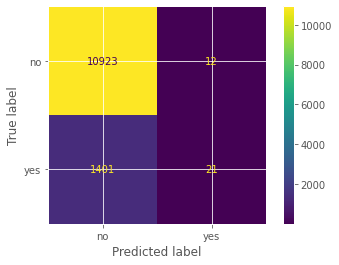

In [17]:
train_model(X,y,LogisticRegression())

# Random Forest

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training RandomForestClassifier in 6.004s
Training performance:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     25613
         yes       1.00      1.00      1.00      3218

    accuracy                           1.00     28831
   macro avg       1.00      1.00      1.00     28831
weighted avg       1.00      1.00      1.00     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.94      0.97      0.95     10935
         yes       0.66      0.51      0.58      1422

    accuracy                           0.91     12357
   macro avg       0.80      0.74      0.76     12357
weighted avg       0.91      0.91      0.91     12357

Testing Data Confusion Matrix Visualization


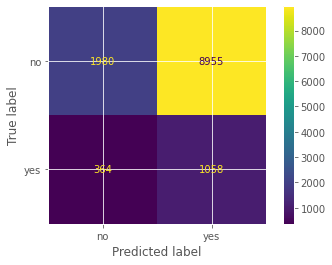

In [18]:
train_model(X, y, RandomForestClassifier())


# Decision Tree

In [19]:
df_bf["y1"] = df_bf["y"].replace({"no": 0, "yes": 1})

In [20]:
feat_cols = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
             "euribor3m", "nr.employed", "job_ct", "mar_ct", "edu_ct", "def_ct", "housing_ct", "loan_ct"]
feat_cols


['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job_ct',
 'mar_ct',
 'edu_ct',
 'def_ct',
 'housing_ct',
 'loan_ct']

In [21]:
X = X[feat_cols]
y = df_bf.y1

In [22]:
model=DecisionTreeClassifier(criterion="entropy", max_depth=2)

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training DecisionTreeClassifier in 0.043s
Training performance:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     25613
           1       0.61      0.41      0.49      3218

    accuracy                           0.91     28831
   macro avg       0.77      0.69      0.72     28831
weighted avg       0.89      0.91      0.90     28831

Testing performance:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10935
           1       0.61      0.39      0.48      1422

    accuracy                           0.90     12357
   macro avg       0.77      0.68      0.71     12357
weighted avg       0.89      0.90      0.89     12357

Testing Data Confusion Matrix Visualization


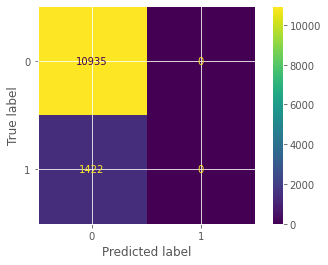

In [23]:
train_model(X,y,model)

In [24]:
def visualize_tree(model, class_names):
    dot_data = StringIO()
    tree.export_graphviz(model, class_names=["0", "1"], out_file=dot_data,
                         feature_names=feat_cols, filled=True, rounded=True,
                         special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()


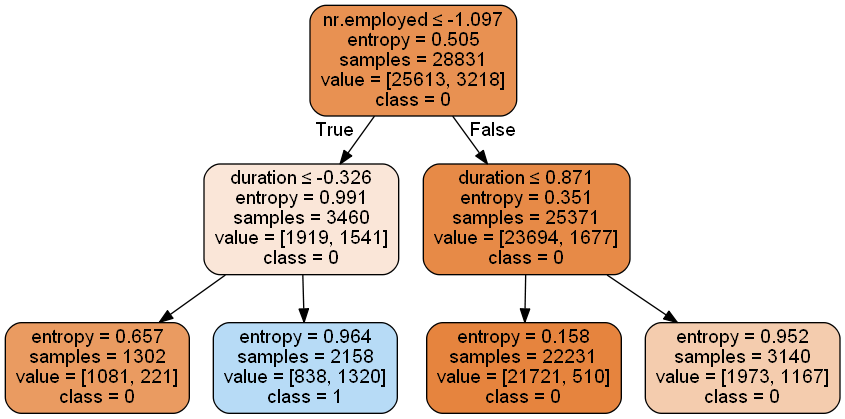

In [25]:
graph = visualize_tree(model, ["0", "1"])
Image(graph)

# Gaussian Naive Bayes

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training GaussianNB in 0.025s
Training performance:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     25613
           1       0.43      0.60      0.50      3218

    accuracy                           0.87     28831
   macro avg       0.69      0.75      0.71     28831
weighted avg       0.89      0.87      0.88     28831

Testing performance:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     10935
           1       0.44      0.60      0.51      1422

    accuracy                           0.86     12357
   macro avg       0.69      0.75      0.71     12357
weighted avg       0.89      0.86      0.87     12357

Testing Data Confusion Matrix Visualization


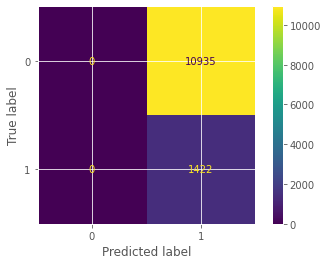

In [26]:
train_model(X,y,GaussianNB())

# Support Vector Machine

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training SVC in 80.801s
Training performance:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     25613
           1       0.63      0.25      0.36      3218

    accuracy                           0.90     28831
   macro avg       0.77      0.62      0.65     28831
weighted avg       0.88      0.90      0.88     28831

Testing performance:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10935
           1       0.65      0.24      0.35      1422

    accuracy                           0.90     12357
   macro avg       0.78      0.61      0.65     12357
weighted avg       0.88      0.90      0.88     12357

Testing Data Confusion Matrix Visualization


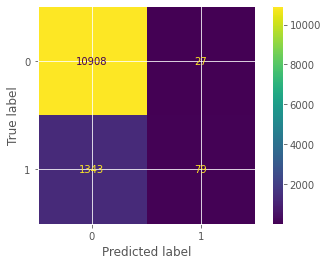

In [27]:
train_model(X,y,SVC(kernel="linear"))

# kNN

In [28]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_ct,mar_ct,edu_ct,def_ct,housing_ct,loan_ct
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,8,0,4,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,0,1,99,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,5,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,5,0,3,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,3,0,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,5,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,2,0,3,0,0,0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=99)

In [30]:
error = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    error.append(np.mean(prediction != y_test))

print(error)

[0.11620943594723639, 0.10131909039410861, 0.10269482884195193, 0.09735372663267783, 0.09500687869223921, 0.09500687869223921, 0.09460224973699118, 0.09314558549809825, 0.09241725337865178, 0.09209355021445334, 0.09136521809500688, 0.09096058913975884, 0.09096058913975884, 0.08998947964716356, 0.08974670227401473, 0.08990855385611395, 0.09071781176661002, 0.09071781176661002, 0.09112244072185806, 0.08982762806506434, 0.09031318281136198, 0.08990855385611395, 0.0903941086024116, 0.09007040543821315, 0.08926114752771708, 0.08974670227401473, 0.08958485069191552, 0.09031318281136198, 0.08950392490086591, 0.08934207331876669, 0.08998947964716356, 0.08998947964716356, 0.088451889617221, 0.08820911224407219, 0.0883709638261714, 0.08909929594561787, 0.0894229991098163, 0.08869466699036983, 0.08885651857246904]


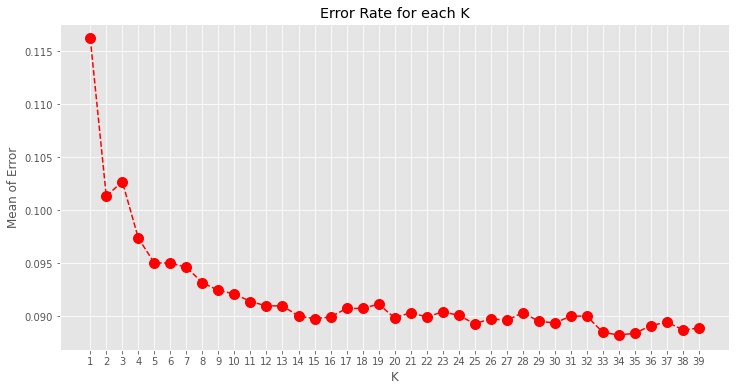

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color="r", linestyle="dashed", marker="o", markersize=10)
plt.title("Error Rate for each K")
plt.xlabel("K")
plt.xticks(range(1, 40))
plt.ylabel("Mean of Error")
plt.show()

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training KNeighborsClassifier in 1.380s
Training performance:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     25613
           1       0.67      0.42      0.51      3218

    accuracy                           0.91     28831
   macro avg       0.80      0.70      0.73     28831
weighted avg       0.90      0.91      0.90     28831

Testing performance:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10935
           1       0.68      0.40      0.50      1422

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357

Testing Data Confusion Matrix Visualization


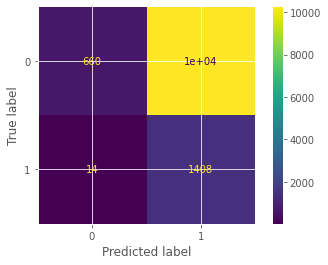

In [32]:
train_model(X,y,KNeighborsClassifier(n_neighbors=39))

#  Comparing All Algorithms

=== Using LogisticRegression ===
Training with 20181 data.. Validating with 8650..
Standardizing data..
Done training LogisticRegression in 0.137s
Training performance:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     17949
           1       0.67      0.39      0.49      2232

    accuracy                           0.91     20181
   macro avg       0.80      0.68      0.72     20181
weighted avg       0.90      0.91      0.90     20181

Testing performance:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7664
           1       0.67      0.41      0.51       986

    accuracy                           0.91      8650
   macro avg       0.80      0.69      0.73      8650
weighted avg       0.90      0.91      0.90      8650

Testing Data Confusion Matrix Visualization
=== Using DecisionTreeClassifier ===
Training with 20181 data.. Validating with 8650..
Standardizing data..
Done

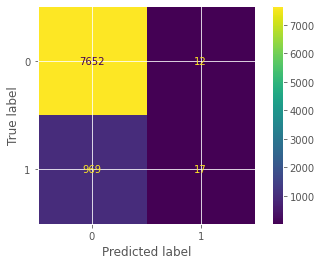

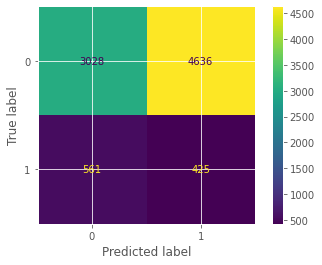

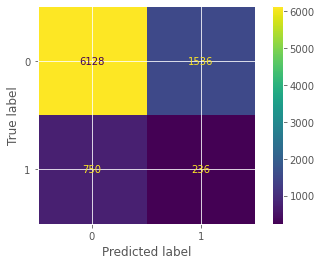

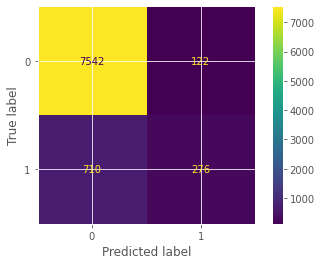

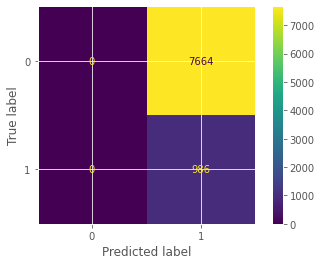

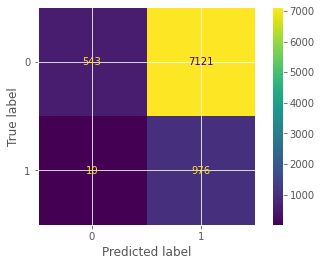

In [33]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(criterion="entropy"),
    RandomForestClassifier(),
    SVC(kernel="linear"),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=39)
]

for model in models:
    print(f"=== Using {model.__class__.__name__} ===")
    train_model(X_train, y_train, model)

# Insight :
Based on f1-score the best model of this case is  Logistic Regression with f-1score 